In [1]:
from pathlib import Path

import util
from util import workflow

browser = False
file = util.notebook_file() if util.is_notebook() else __file__
tag = util.file_tag(file)
root_path = Path("..")

In [2]:
from util import p_

import automech

mech0 = automech.io.read(
    p_.original_mechanism(tag, ext="json", path=p_.data(root_path))
)
mech = automech.io.read(
    p_.mechanism(tag, ext="json", path=p_.data(root_path))
)
print(automech.reaction_count(mech0))
print(automech.reaction_count(mech))

automech.display(mech)

2
4


In [2]:
# # Build
# from automol.graph import enum

# import automech
# from automech.species import Species

# par_mech = workflow.read_parent_mechanism(root_path=root_path)
# mech = automech.from_smiles(spc_smis=["C1=CCCC1", "C12C(O2)CCC1"], src_mech=par_mech)
# #  - add HO2 addition to *ene*
# mech = automech.enumerate_reactions(
#     mech,
#     enum.ReactionSmarts.pi2_addition,
#     rcts_=[None, "O[O]"],
#     spc_col_=Species.smiles,
#     src_mech=par_mech,
# )
# #  - add ring-forming scission
# mech = automech.enumerate_reactions(
#     mech,
#     enum.ReactionSmarts.qooh_ring_forming_scission,
#     src_mech=par_mech,
# )
# automech.display(mech)

In [3]:
# # Read
# workflow.prepare_simulation(tag=tag, root_path=root_path)

name: C5H8(522)
smiles: C1=CCCC1


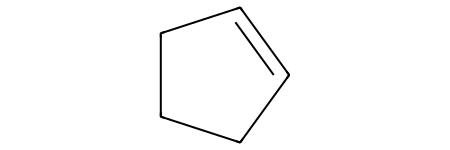

alt.LayerChart(...)

name: C5H8O(825)rs
smiles: C1C[C@H]2[C@@H](C1)O2


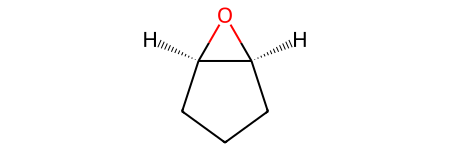

alt.LayerChart(...)

name: CPT(563)
smiles: C1CCCC1


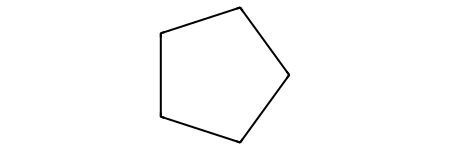

alt.LayerChart(...)

name: O2(6)
smiles: O=O


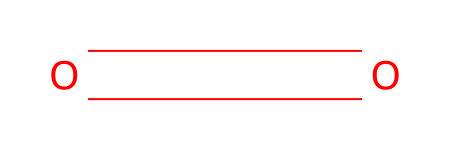

alt.LayerChart(...)

name: H2(2)
smiles: [H][H]


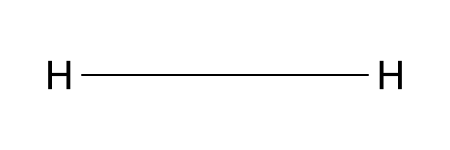

alt.LayerChart(...)

name: H2O(5)
smiles: O


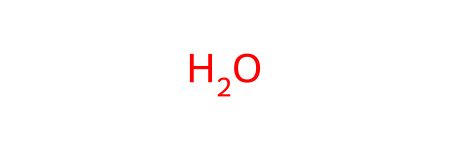

alt.LayerChart(...)

name: CO(12)
smiles: O=[C]


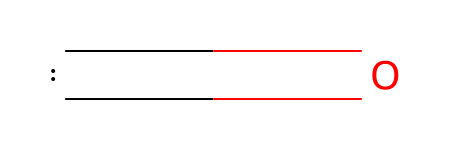

alt.LayerChart(...)

name: CO2(13)
smiles: O=C=O


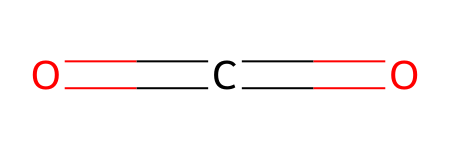

alt.LayerChart(...)

name: CH4(33)
smiles: C


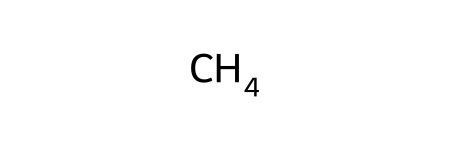

alt.LayerChart(...)

name: CH3CHO(41)
smiles: O=CC


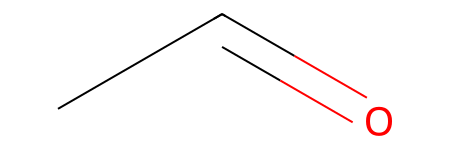

alt.LayerChart(...)

name: C2H4(52)
smiles: C=C


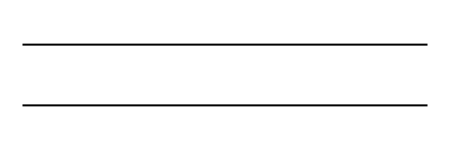

alt.LayerChart(...)

name: C3H6(131)
smiles: CC=C


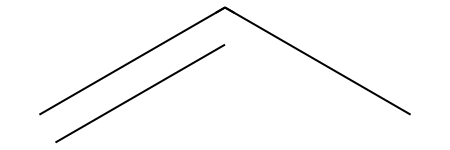

alt.LayerChart(...)

name: C3H4O(165)
smiles: O=CC=C


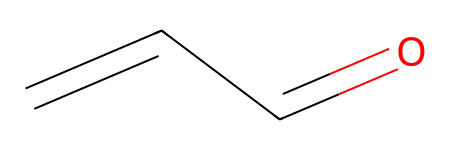

alt.LayerChart(...)

name: C4H6(227)
smiles: C=CC=C


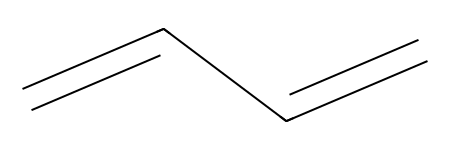

alt.LayerChart(...)

name: C4H8(253)
smiles: CCC=C


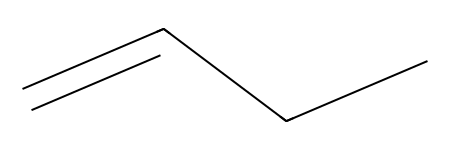

alt.LayerChart(...)

name: C5H6(478)
smiles: C1C=CC=C1


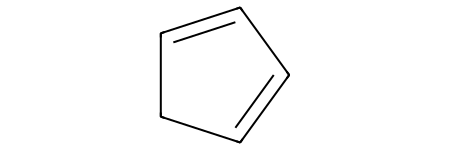

alt.LayerChart(...)

name: C6H6(970)
smiles: C1=CC=CC=C1


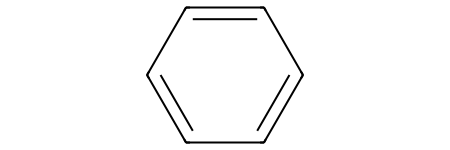

alt.LayerChart(...)

In [4]:
from util import p_

import automech

# Plot
chart_dct = workflow.plot_simulation(
    tag=tag,
    x_col="O2_molecules",
    root_path=root_path,
    line_source_=["Hill", "Lokachari"],
    point_source="Experiment",
    control=False,
)
mech = automech.io.read(
    p_.full_calculated_mechanism(tag, "json", path=p_.data(root_path))
)
for name, chart in chart_dct.items():
    automech.display_species(mech, [name])
    chart.show()

In [5]:
# Write
workflow.plot_rates(tag=tag, root_path=root_path)


Reading mechanisms...



Compare calculated mechanism to parent mechanism...

*********
Reaction: S(722)r1 = C5H8(522) + HO2(8)
Translations:
  smiles:
    reactants = ['OO[C@@H]1[CH]CCC1']
    products = ['C1=CCCC1', '[O]O']
Rate parameters:
  This work:
    S(722)r1 = C5H8(522) + HO2(8)                            9.423E+12      0.000      14622
  Hill:
    S(722) = C5H8(522) + HO2(8)                                  1.000      0.000      0.000
        PLOG  /  0.0009870  1.160E+10     0.2500      18810/
        PLOG  /  0.0009870  3.200E+42     -9.300      34890/
        PLOG  /   0.009870  8.010E+14     -1.060      20210/
        PLOG  /   0.009870  4.070E+34     -6.510      32930/
        PLOG  /    0.09870  4.260E-07      6.110      14280/
        PLOG  /    0.09870  1.680E-33      13.44       2462/
        PLOG  /     0.9870  1.010E+39     -9.820      19290/
        PLOG  /     0.9870      1.920      4.000      15010/
        PLOG  /      9.870  6.240E+30     -6.270      19030/
        PLOG  /      9.87

alt.Chart(...)


*********
Reaction: S(722)r1 = C5H8O(825)rs + OH(4)
Translations:
  smiles:
    reactants = ['OO[C@@H]1[CH]CCC1']
    products = ['C1C[C@H]2[C@@H](C1)O2', '[OH]']
Rate parameters:
  This work:
    S(722)r1 = C5H8O(825)rs + OH(4)                          2.225E+12      0.000       9076
  Hill:
    S(722) = C5H8O(825) + OH(4)                                  1.000      0.000      0.000
        PLOG  /  0.0009870      96.20      2.050       3050/
        PLOG  /  0.0009870  4.840E+35     -7.840      19690/
        PLOG  /   0.009870  1.290E+13     -1.370       5946/
        PLOG  /   0.009870  2.230E+38     -8.490      20330/
        PLOG  /    0.09870  3.220E+22     -4.170       8727/
        PLOG  /    0.09870  2.120E+32     -6.320      18790/
        PLOG  /     0.9870  1.280E+25     -4.670      10250/
        PLOG  /     0.9870  4.000E+24     -3.630      17390/
        PLOG  /      9.870  9.850E+17     -2.010       9428/
        PLOG  /      9.870  1.220E+79     -19.63      47130/
  

alt.Chart(...)


*********
Reaction: C5H8(522) + HO2(8) = C5H8O(825)rs + OH(4)
Translations:
  smiles:
    reactants = ['C1=CCCC1', '[O]O']
    products = ['C1C[C@H]2[C@@H](C1)O2', '[OH]']
Rate parameters:
  This work:
    C5H8(522) + HO2(8) = C5H8O(825)rs + OH(4)                 63180000      1.218      10502
  Hill:
    C5H8(522) + HO2(8) = C5H8O(825) + OH(4)                      1.000      0.000      0.000
        PLOG  /  0.0009870  6.250E+19     -2.220      18570/
        PLOG  /  0.0009870  107000000      1.050      10300/
        PLOG  /   0.009870  1.120E+19     -2.010      18020/
        PLOG  /   0.009870  150000000     0.9900      10300/
        PLOG  /    0.09870  1.580E+18     -1.770      17450/
        PLOG  /    0.09870  152000000     0.9800      10270/
        PLOG  /     0.9870  2.960E+18     -1.860      17720/
        PLOG  /     0.9870  497000000     0.8500      10600/
        PLOG  /      9.870  7.480E+11    0.08000      13430/
        PLOG  /      9.870 3630000000     0.4100      

alt.Chart(...)


*********
Reaction: S(722)r0 = C5H8(522) + HO2(8)
Translations:
  smiles:
    reactants = ['OO[C@H]1[CH]CCC1']
    products = ['C1=CCCC1', '[O]O']
Rate parameters:
  This work:
    S(722)r0 = C5H8(522) + HO2(8)                            9.423E+12      0.000      14622
  Hill:
    S(722) = C5H8(522) + HO2(8)                                  1.000      0.000      0.000
        PLOG  /  0.0009870  1.160E+10     0.2500      18810/
        PLOG  /  0.0009870  3.200E+42     -9.300      34890/
        PLOG  /   0.009870  8.010E+14     -1.060      20210/
        PLOG  /   0.009870  4.070E+34     -6.510      32930/
        PLOG  /    0.09870  4.260E-07      6.110      14280/
        PLOG  /    0.09870  1.680E-33      13.44       2462/
        PLOG  /     0.9870  1.010E+39     -9.820      19290/
        PLOG  /     0.9870      1.920      4.000      15010/
        PLOG  /      9.870  6.240E+30     -6.270      19030/
        PLOG  /      9.870  1.360E+22     -2.540      24490/
        PLOG  /   

alt.Chart(...)


*********
Reaction: S(722)r0 = C5H8O(825)rs + OH(4)
Translations:
  smiles:
    reactants = ['OO[C@H]1[CH]CCC1']
    products = ['C1C[C@H]2[C@@H](C1)O2', '[OH]']
Rate parameters:
  This work:
    S(722)r0 = C5H8O(825)rs + OH(4)                          2.225E+12      0.000       9076
  Hill:
    S(722) = C5H8O(825) + OH(4)                                  1.000      0.000      0.000
        PLOG  /  0.0009870      96.20      2.050       3050/
        PLOG  /  0.0009870  4.840E+35     -7.840      19690/
        PLOG  /   0.009870  1.290E+13     -1.370       5946/
        PLOG  /   0.009870  2.230E+38     -8.490      20330/
        PLOG  /    0.09870  3.220E+22     -4.170       8727/
        PLOG  /    0.09870  2.120E+32     -6.320      18790/
        PLOG  /     0.9870  1.280E+25     -4.670      10250/
        PLOG  /     0.9870  4.000E+24     -3.630      17390/
        PLOG  /      9.870  9.850E+17     -2.010       9428/
        PLOG  /      9.870  1.220E+79     -19.63      47130/
   

alt.Chart(...)


*********
Reaction: C5H8(522) + HO2(8) = C5H8O(825)rs + OH(4)
Translations:
  smiles:
    reactants = ['C1=CCCC1', '[O]O']
    products = ['C1C[C@H]2[C@@H](C1)O2', '[OH]']
Rate parameters:
  This work:
    C5H8(522) + HO2(8) = C5H8O(825)rs + OH(4)                 63180000      1.218      10502
  Hill:
    C5H8(522) + HO2(8) = C5H8O(825) + OH(4)                      1.000      0.000      0.000
        PLOG  /  0.0009870  6.250E+19     -2.220      18570/
        PLOG  /  0.0009870  107000000      1.050      10300/
        PLOG  /   0.009870  1.120E+19     -2.010      18020/
        PLOG  /   0.009870  150000000     0.9900      10300/
        PLOG  /    0.09870  1.580E+18     -1.770      17450/
        PLOG  /    0.09870  152000000     0.9800      10270/
        PLOG  /     0.9870  2.960E+18     -1.860      17720/
        PLOG  /     0.9870  497000000     0.8500      10600/
        PLOG  /      9.870  7.480E+11    0.08000      13430/
        PLOG  /      9.870 3630000000     0.4100      

alt.Chart(...)

In [6]:
# import automech
# from mechdriver.subtasks import display

# chan = "1: 4"

# # TRANSITION STATE
# #   - Read in expanded mechanism
# mech_path = util.p_.mechanism(tag, ext="json", path=util.p_.data(root_path))
# mech = automech.io.read(mech_path)

# #   - Display the reaction
# automech.display_reactions(mech, chans=[chan])

In [7]:
# #   - Display the TS mode
# calc_path = util.p_.calc(root_path, tag)
# display("conf_opt", chan, path=calc_path)

In [8]:
# #   - Display the TS mode
# calc_path = util.p_.calc(root_path, tag)
# display("find_ts", chan, path=calc_path)

In [9]:
# # REACTION RATE
# #   - Read in calculated mechanism
# cal_mech = automech.io.read(data_path / f"{tag}_calc.json")

# #   - Read in other mechanisms for comparison
# par_mech = automech.io.read(data_path / "full_raw.json")
# tags0 = util.previous_tags(tag)
# trues = [True] * len(tags0)
# names0 = list(map(util.calculated_mechanism_name, tags0))
# mechs0 = [automech.io.read(data_path / f"{name}.json") for name in names0]

# #   - Display the reaction and calculated rate
# automech.display_reactions(
#     cal_mech,
#     chans=[chan],
#     comp_mechs=[par_mech, *mechs0],
#     comp_labels=["Hill", *tags0],
#     comp_stereo=[False, *trues],
# )